<a href="https://colab.research.google.com/github/cpriest7/DSGT-Athletics-SubTeam7/blob/main/Win_Prob_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pb1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2017_games.csv')
pb2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2018_games.csv')
pb3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2019_games.csv')
pb4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020_games.csv')
pb5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022_games.csv')
pbp = pd.concat([pb1,pb2,pb3,pb4,pb5], axis = 0)

games = pbp['game_id'].unique()
train_games = np.random.choice(games, size=int(0.75 * len(games)), replace=False)
train = pbp[pbp['game_id'].isin(train_games)]
test = pbp[~pbp['game_id'].isin(train_games)]
X_train = train.drop(['game_id', 'away_score','home_score','year', 'home_win'], axis=1)
y_train = train['home_win']

result = LogisticRegression().fit(X_train, y_train)
train_predictions = result.predict(X_train)
train_predictions_01 = np.round(train_predictions)
train_accuracy = accuracy_score(y_train, train_predictions_01)

X_test = test.drop(['game_id', 'away_score','home_score','year', 'home_win'], axis=1)
test_predictions = result.predict(X_test)
test_predictions_01 = np.round(test_predictions)
y_test = test['home_win']
test_accuracy = accuracy_score(y_test, test_predictions_01)

print(f"Training Accuracy %: {round(100 * train_accuracy, 2)}")
print(f"Test Accuracy %: {round(100 * test_accuracy, 2)}")

Training Accuracy %: 79.6
Test Accuracy %: 80.29


In [151]:
#Used code from https://xgboost.readthedocs.io/en/stable/get_started.html
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=7, subsample=0.99, min_child_weight=36, learning_rate=0.5, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
test_accuracy = accuracy_score(y_test, preds)
print(f"Test Accuracy %: {round(100 * test_accuracy, 2)}")

Test Accuracy %: 78.98


<Axes: xlabel='possession', ylabel='home_win'>

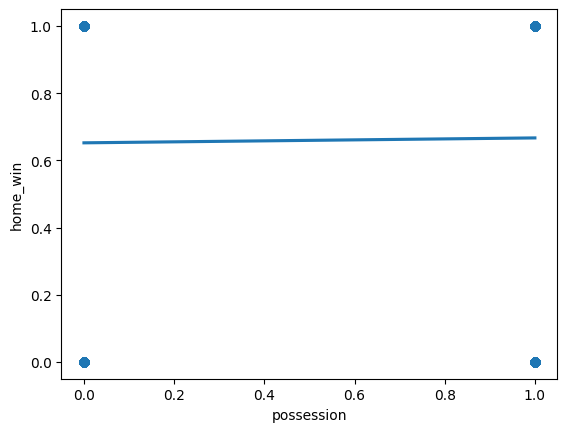

In [136]:
#Used code from https://statology.org/plot-logistic-regression-in-python/
import seaborn as sns
x = train['possession']
y = train['home_win']
sns.regplot(x=x, y=y, data=train, logistic=True, ci=None)